# Clustering Assignments

## 1. K-Means Clustering

In [1]:
# 1. Read in the cereal.csv file
import pandas as pd
df = pd.read_csv('../Data/cereal.csv')
df

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25
...,...,...,...,...,...,...,...
69,Triples,General Mills,110,2,1,3,25
70,Trix,General Mills,110,1,1,12,25
71,Wheat_Chex,Ralston Purina,100,3,1,3,25
72,Wheaties,General Mills,100,3,1,3,25


In [2]:
df['Cereal Name'].nunique(), df['Manufacturer'].nunique()

(74, 7)

In [3]:
df.isnull().sum()

Cereal Name              0
Manufacturer             0
Calories                 0
Protein (g)              0
Fat                      0
Sugars                   0
Vitamins and Minerals    0
dtype: int64

In [4]:
df.dtypes

Cereal Name              object
Manufacturer             object
Calories                  int64
Protein (g)               int64
Fat                       int64
Sugars                    int64
Vitamins and Minerals     int64
dtype: object

In [5]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
data = df.drop(columns=['Cereal Name', 'Manufacturer'])
data.head(3)

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25


In [6]:
data.describe()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,105.540541,2.500000,0.945946,6.770270,28.378378
std,18.442201,1.088546,0.963610,4.467684,22.787104
min,50.000000,1.000000,0.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,3.000000,25.000000
50%,110.000000,2.000000,1.000000,6.000000,25.000000
75%,110.000000,3.000000,1.000000,10.750000,25.000000
max,160.000000,6.000000,5.000000,15.000000,100.000000


In [7]:
# 3. Fit a K-Means Clustering model with 2 clusters
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)

KMeans(n_clusters=2, random_state=42)

In [8]:
# 4. Interpret the cluster centers

In [9]:
kmeans2.n_clusters, kmeans2.n_features_in_, kmeans2.cluster_centers_, kmeans2.labels_

(2,
 5,
 array([[104.55882353,   2.48529412,   0.95588235,   6.80882353,
          22.05882353],
        [116.66666667,   2.66666667,   0.83333333,   6.33333333,
         100.        ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0]))

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# combine the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='cluster')

# create a combined dataframe (data & cluster labels)
df_clean = pd.concat([data, cluster_labels], axis=1)
df_clean.head(3) 

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,cluster
0,70,4,1,6,25,0
1,120,3,5,8,0,0
2,70,4,1,5,25,0


In [12]:
data.columns

Index(['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals'], dtype='object')

In [13]:
data.mean()

Calories                 105.540541
Protein (g)                2.500000
Fat                        0.945946
Sugars                     6.770270
Vitamins and Minerals     28.378378
dtype: float64

In [14]:
kmeans2.cluster_centers_

array([[104.55882353,   2.48529412,   0.95588235,   6.80882353,
         22.05882353],
       [116.66666667,   2.66666667,   0.83333333,   6.33333333,
        100.        ]])

In [15]:
cluster_centers = pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)
cluster_centers

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,104.558824,2.485294,0.955882,6.808824,22.058824
1,116.666667,2.666667,0.833333,6.333333,100.000000


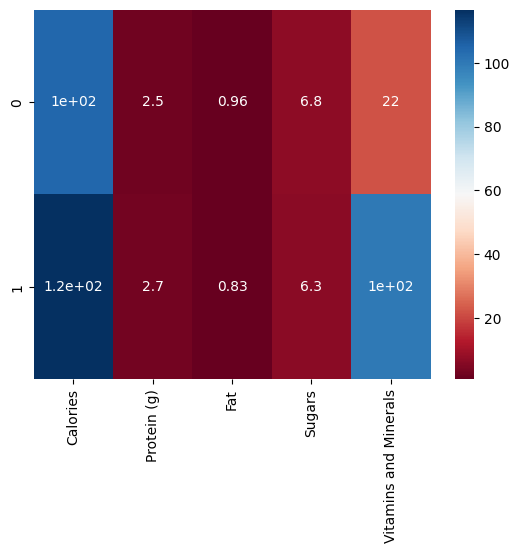

In [16]:
# view the cluster centers in a heatmap
import seaborn as sns
sns.heatmap(cluster_centers, cmap='RdBu', annot=True);

In [17]:
# Cluster 1: low on vitamins and minerals
# Cluster 2: high on vitamins and minerals

## 2. Inertia Plot

In [18]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
# create an empty list to hold the inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
inertia_values

[30041.73039215686,
 17167.537634408603,
 12430.331666666665,
 9765.241666666663,
 7403.834045584044,
 5690.00071225071,
 3951.448148148148,
 3097.2814814814815,
 2676.448148148148,
 2078.1905723905725,
 1657.5700534759358,
 1281.7145104895103,
 1178.2145104895103,
 779.2637529137529]

In [19]:
# turn the list into a series for plotting
# change the index to map to the value of 'k'
inertia_series = pd.Series(inertia_values, index=range(2, 16))
inertia_series.head()

2    30041.730392
3    17167.537634
4    12430.331667
5     9765.241667
6     7403.834046
dtype: float64

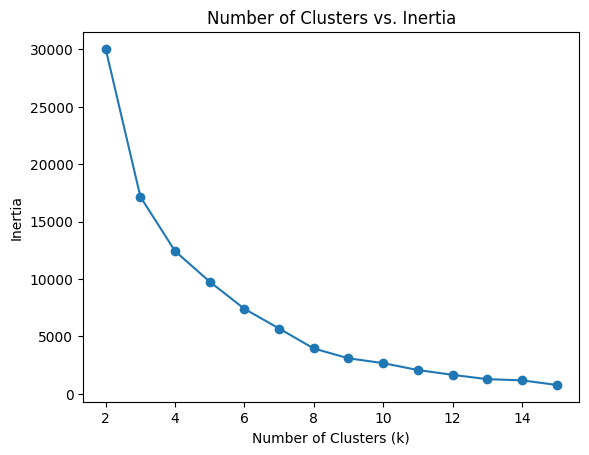

In [20]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
# plot the inertia values
import matplotlib.pyplot as plt

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [21]:
# 3. Identify the elbow of the plot
# k = 3

In [22]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

In [23]:
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
cluster_centers3

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,108.709677,2.451613,1.016129,7.290323,22.983871
1,116.666667,2.666667,0.833333,6.333333,100.000000
2,61.666667,2.833333,0.333333,1.833333,12.500000


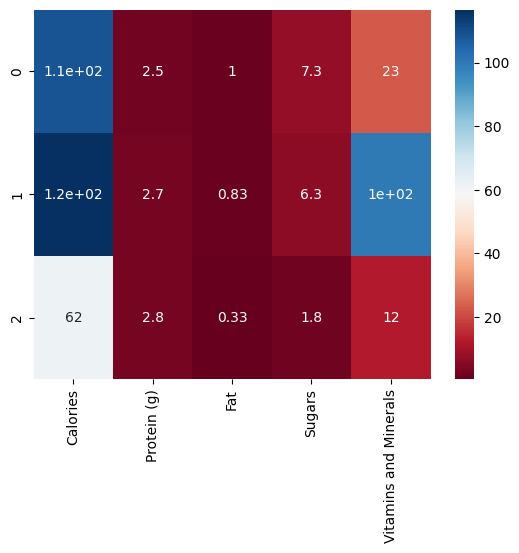

In [24]:
# 5. Interpret the cluster centers using a heat map
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

* Cluster 0: **In the Middle (Typical Cereals)**
* Cluster 1: **High in Calories & Vitamins and Minerals (Hearty Cereals)**
* Cluster 2: **Average/Low in Calories & Vitamins and Minerals (Empty Cereals)**

## 3. Tune the K-Means Model

In [ ]:
# 1. Remove the ”Fat” column


In [ ]:
# 2. Standardize the remaining columns


In [ ]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters


In [ ]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis


In [ ]:
# 3c. Identify the elbow of the plot


In [ ]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow


In [ ]:
# 3e. Interpret the cluster centers using a heat map


## 4. Select the Best K-Means Model

In [ ]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model


In [ ]:
# 2. Look at the number of cereals that fall into each cluster


In [ ]:
# 3. Decide on the best model for our client


In [ ]:
# 4. Recommend a specific number of displays


In [ ]:
# 5. Suggest a few cereals that should be shown in each display


## 5. Hierarchical Clustering

In [ ]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set


In [ ]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold


In [ ]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set


In [ ]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold


In [ ]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels


In [ ]:
# 6. Create a cluster map of the “best” results and interpret the clusters


## 6. DBSCAN

In [ ]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models


In [ ]:
# 2. Apply the function on both the original and standardized data sets


In [ ]:
# 3. Find the highest silhouette score and note down the eps and min_samples values


In [ ]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
